<a href="https://colab.research.google.com/github/GouravSwain2566/CC-FEB-DATA_SCIENCE/blob/main/TASK_2_Market_Basket_Analysis_in_Python_using_Apriori_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
#Loading neccesary packages
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates

In [ ]:
#Reading Data From Web
grocery_df = pd.read_csv("/content/drive/MyDrive/IR LAB/Groceries.csv")

In [ ]:
grocery_df.head()

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4


In [ ]:
len(grocery_df)

38765

In [ ]:
grocery_df.isna().sum()

Member_number      0
Date               0
itemDescription    0
year               0
month              0
day                0
day_of_week        0
dtype: int64

In [ ]:
len(grocery_df[grocery_df.duplicated(keep='first')==True])

759

In [ ]:
grocery_df.drop_duplicates(inplace=True)

In [ ]:
grocery_df.dtypes

Member_number       int64
Date               object
itemDescription    object
year                int64
month               int64
day                 int64
day_of_week         int64
dtype: object

In [ ]:
grocery_df['itemDescription'].value_counts(ascending=False).reset_index()

,index,itemDescription
0,whole milk,2363
1,other vegetables,1827
2,rolls/buns,1646
3,soda,1453
4,yogurt,1285
...,...,...
162,rubbing alcohol,5
163,bags,4
164,baby cosmetics,3
165,kitchen utensil,1


In [ ]:
date_df= grocery_df.groupby('Date')['itemDescription'].count().reset_index()

Text(0, 0.5, 'Number of Items Sold')

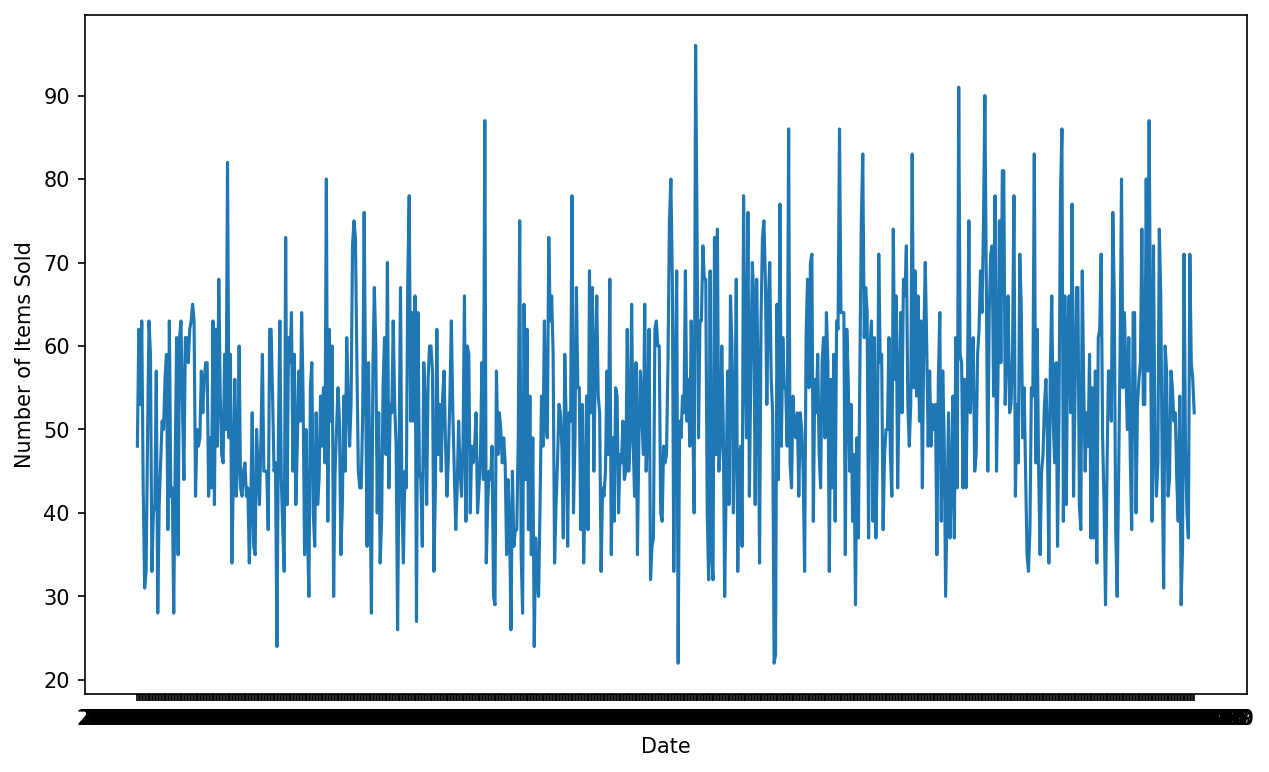

In [ ]:
plt.figure(figsize=(10,6), dpi=150)
sns.lineplot(data= date_df, x='Date', y='itemDescription')
plt.xlabel('Date')
plt.ylabel('Number of Items Sold')

In [ ]:
grocery_df.groupby('Date')['itemDescription'].count().idxmax()

'2015-01-21'

In [ ]:
grocery_df.groupby('Date')['itemDescription'].count().idxmin()

'2015-01-09'

<Figure size 750x450 with 0 Axes>

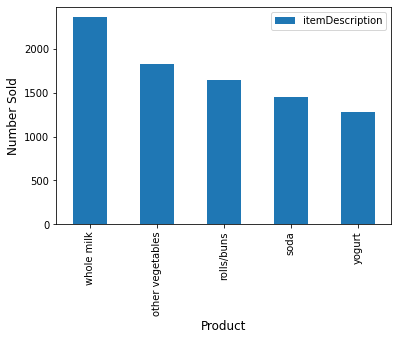

In [ ]:
plt.figure(figsize=(5,3), dpi=150)
grocery_df.itemDescription.value_counts(ascending=False).reset_index().head(5).plot(kind='bar', x='index')
plt.xlabel('Product', size= 12)
plt.ylabel('Number Sold', size= 12)
plt.show()

In [ ]:
grocery_df[(grocery_df.Member_number==1808) & (grocery_df.Date== '2015-07-21')]

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
16149,1808,2015-07-21,rolls/buns,2015,7,21,1
36088,1808,2015-07-21,candy,2015,7,21,1


In [ ]:
member = grocery_df.Member_number.values

In [ ]:
dates = grocery_df.Date.values 

In [ ]:
transactions = [list(grocery_df[(grocery_df['Member_number'] == i[0]) & (grocery_df['Date'] == i[1])].itemDescription) for i in zip(member,dates)]

In [ ]:
transactions[0]

['tropical fruit', 'rolls/buns', 'candy']

In [ ]:
print(len(transactions))

38006


In [ ]:
from itertools import permutations

In [ ]:
flattenlist= [i for row in transactions for  i in row  ]

In [ ]:
flattenlist= list(set(flattenlist))

In [ ]:
rules = list(permutations(flattenlist,2))

In [ ]:
rules[0], len(rules)

(('ice cream', 'instant coffee'), 27722)

In [ ]:
from collections import Counter

In [ ]:
newlist= []
for i in transactions:
    newlist.append(tuple(i))

In [ ]:
c= Counter(newlist)

In [ ]:
c.most_common(1)

[(('other vegetables', 'whole milk'), 98)]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
encoder = TransactionEncoder().fit(transactions)

In [ ]:
onehot = encoder.transform(transactions)

In [ ]:
onehot = pd.DataFrame(onehot, columns = encoder.columns_)
onehot.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [ ]:
len(onehot)

38006

In [ ]:
print(onehot.mean())

Instant food products    0.004499
UHT-milk                 0.024575
abrasive cleaner         0.001921
artif. sweetener         0.002947
baby cosmetics           0.000316
                           ...   
white bread              0.029022
white wine               0.013840
whole milk               0.181445
yogurt                   0.100931
zwieback                 0.004868
Length: 167, dtype: float64


In [ ]:
onehot['other vegetables & whole milk'] = np.logical_and(onehot['other vegetables'],onehot['whole milk'])

In [ ]:
print(onehot.mean())

Instant food products            0.004499
UHT-milk                         0.024575
abrasive cleaner                 0.001921
artif. sweetener                 0.002947
baby cosmetics                   0.000316
                                   ...   
white wine                       0.013840
whole milk                       0.181445
yogurt                           0.100931
zwieback                         0.004868
other vegetables & whole milk    0.021944
Length: 168, dtype: float64


In [ ]:
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()

In [ ]:
confidence= support_vegandmilk/support_vegetable

In [ ]:
print("Confidence: ", confidence)

Confidence:  1.0


In [ ]:
lift = support_vegandmilk/(support_vegetable* support_milk)

In [ ]:
print("Lift: ", lift)

Lift:  5.511310904872389


In [ ]:
Leverage= support_vegandmilk - (support_vegetable* support_milk)

In [ ]:
print("Leverage: ", Leverage)

Leverage:  0.01796229123860991


In [ ]:
support_milk= onehot['whole milk'].mean()
support_vegetable= onehot['other vegetables & whole milk'].mean()
support_vegandmilk= np.logical_and(onehot['other vegetables'],onehot['whole milk']).mean()

In [ ]:
num = support_vegandmilk - support_milk*support_vegetable

In [ ]:
denom = max(support_vegandmilk*(1-support_vegetable), support_vegetable*(support_milk-support_vegandmilk))

In [ ]:
zhang = num / denom
print("Zhang Metric" ,zhang)

Zhang Metric 0.8369202625632196


In [ ]:
frequent_itemsets = apriori(onehot, min_support = 0.01, max_len = 3, use_colnames = True)

In [ ]:
print(len(frequent_itemsets))

92


In [ ]:
frequent_itemsets.head()

,support,itemsets
0,0.024575,(UHT-milk)
1,0.039599,(beef)
2,0.024917,(berries)
3,0.019365,(beverages)
4,0.054860,(bottled beer)


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

In [ ]:
frequent_itemsets = apriori(onehot, use_colnames=True, min_support=0.01, max_len = 2)

In [ ]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
2,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266
3,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151
4,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216


In [ ]:
len(rules)

42

In [ ]:
rules.consequents.unique()

array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'bottled water'}), frozenset({'citrus fruit'}),
       frozenset({'other vegetables'}), frozenset({'rolls/buns'}),
       frozenset({'sausage'}), frozenset({'soda'}), frozenset({'yogurt'}),
       frozenset({'other vegetables & whole milk'}),
       frozenset({'pastry'}), frozenset({'root vegetables'}),
       frozenset({'tropical fruit'})], dtype=object)

In [ ]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values, 
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,0.060430
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,0.052336
2,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622
3,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396
4,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,0.019791


In [ ]:
rules[rules.zhang<=0]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
2,(whole milk),(bottled water),0.181445,0.069226,0.010209,0.056265,0.812766,-0.002352,0.986266,-0.219622
3,(bottled water),(whole milk),0.069226,0.181445,0.010209,0.147472,0.812766,-0.002352,0.960151,-0.198396
6,(rolls/buns),(other vegetables),0.126822,0.136531,0.015576,0.122822,0.899587,-0.001739,0.984371,-0.113344
7,(other vegetables),(rolls/buns),0.136531,0.126822,0.015576,0.114087,0.899587,-0.001739,0.985625,-0.114473
10,(soda),(other vegetables),0.111482,0.136531,0.013945,0.125089,0.916191,-0.001276,0.986921,-0.093343
11,(other vegetables),(soda),0.136531,0.111482,0.013945,0.102139,0.916191,-0.001276,0.989594,-0.095792
12,(whole milk),(other vegetables),0.181445,0.136531,0.021944,0.120940,0.885803,-0.002829,0.982264,-0.136066
13,(other vegetables),(whole milk),0.136531,0.181445,0.021944,0.160725,0.885803,-0.002829,0.975312,-0.129908
14,(yogurt),(other vegetables),0.100931,0.136531,0.012288,0.121741,0.891675,-0.001493,0.983160,-0.119038
15,(other vegetables),(yogurt),0.136531,0.100931,0.012288,0.089998,0.891675,-0.001493,0.987985,-0.123340


In [ ]:
rules[rules.zhang>0].sort_values('zhang', ascending=False) 

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
40,(whole milk),(other vegetables & whole milk),0.181445,0.021944,0.021944,0.120940,5.511311,0.017962,1.112615,1.000000
17,(other vegetables),(other vegetables & whole milk),0.136531,0.021944,0.021944,0.160725,7.324340,0.018948,1.165358,1.000000
16,(other vegetables & whole milk),(other vegetables),0.021944,0.136531,0.021944,1.000000,7.324340,0.018948,inf,0.882842
41,(other vegetables & whole milk),(whole milk),0.021944,0.181445,0.021944,1.000000,5.511311,0.017962,inf,0.836920
32,(yogurt),(sausage),0.100931,0.074225,0.010051,0.099583,1.341633,0.002559,1.028162,0.283226
33,(sausage),(yogurt),0.074225,0.100931,0.010051,0.135413,1.341633,0.002559,1.039882,0.275056
29,(soda),(sausage),0.111482,0.074225,0.010051,0.090158,1.214658,0.001776,1.017512,0.198896
28,(sausage),(soda),0.074225,0.111482,0.010051,0.135413,1.214658,0.001776,1.027679,0.190892
30,(whole milk),(sausage),0.181445,0.074225,0.014998,0.082657,1.113593,0.001530,1.009191,0.124617
31,(sausage),(whole milk),0.074225,0.181445,0.014998,0.202056,1.113593,0.001530,1.025830,0.110185


In [ ]:
rules = association_rules(frequent_itemsets,metric = "leverage", min_threshold = 0)

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216
3,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230
4,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144


In [ ]:
len(rules)

18

In [ ]:
rules.consequents.unique()

array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'citrus fruit'}), frozenset({'other vegetables'}),
       frozenset({'sausage'}),
       frozenset({'other vegetables & whole milk'}), frozenset({'soda'}),
       frozenset({'yogurt'})], dtype=object)

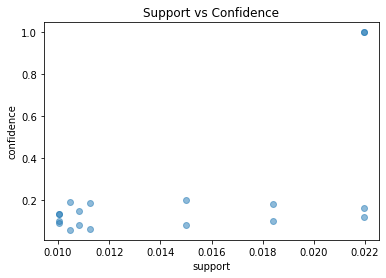

In [ ]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

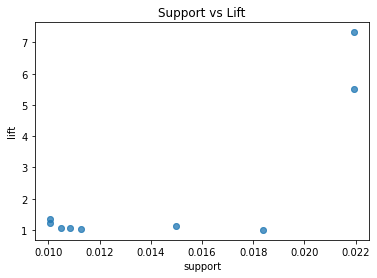

In [ ]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

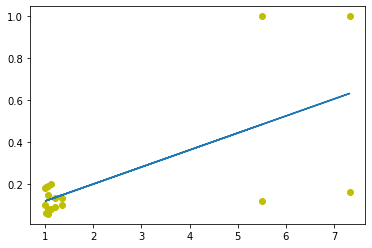

In [ ]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'],fit_fn(rules['lift']))

In [ ]:
targeted_rules = rules[rules['consequents'] == {'whole milk'}].copy()

In [ ]:
targeted_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216
11,(sausage),(whole milk),0.074225,0.181445,0.014998,0.202056,1.113593,0.001530,1.025830
14,(yogurt),(whole milk),0.100931,0.181445,0.018392,0.182221,1.004277,0.000078,1.000949
17,(other vegetables & whole milk),(whole milk),0.021944,0.181445,0.021944,1.000000,5.511311,0.017962,inf


In [ ]:
filtered_rules = targeted_rules[(targeted_rules['antecedent support'] > 0.01) &
(targeted_rules['support'] > 0.009) &
(targeted_rules['confidence'] > 0.85) &
(targeted_rules['lift'] > 1.00)]

In [ ]:
print(filtered_rules['antecedents'])

17    (other vegetables & whole milk)
Name: antecedents, dtype: object


In [ ]:
frequent_itemsets = apriori(onehot, min_support=0.01,use_colnames=True, max_len=2)

In [ ]:
len(frequent_itemsets )

91

In [ ]:
rules = association_rules(frequent_itemsets,metric = "support",min_threshold = 0.0)

In [ ]:
len(rules)

42

In [ ]:
rules['antecedents'] = rules['antecedents'].apply(lambda a: ','.join(list(a)))
rules['consequents'] = rules['consequents'].apply(lambda a: ','.join(list(a)))

In [ ]:
print(rules[['antecedents','consequents']].head())

     antecedents    consequents
0     whole milk   bottled beer
1   bottled beer     whole milk
2     whole milk  bottled water
3  bottled water     whole milk
4   citrus fruit     whole milk


In [ ]:
support_table = rules.pivot(index='consequents', columns='antecedents',values='support')

In [ ]:
support_table.head()

antecedents,bottled beer,bottled water,citrus fruit,other vegetables,other vegetables & whole milk,pastry,rolls/buns,root vegetables,sausage,soda,tropical fruit,whole milk,yogurt
consequents,,,,,,,,,,,,,
bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010472,NaN
bottled water,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.010209,NaN
citrus fruit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.011261,NaN
other vegetables,NaN,NaN,NaN,NaN,0.021944,NaN,0.015576,NaN,0.01084,0.013945,NaN,0.021944,0.012288
other vegetables & whole milk,NaN,NaN,NaN,0.021944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021944,NaN


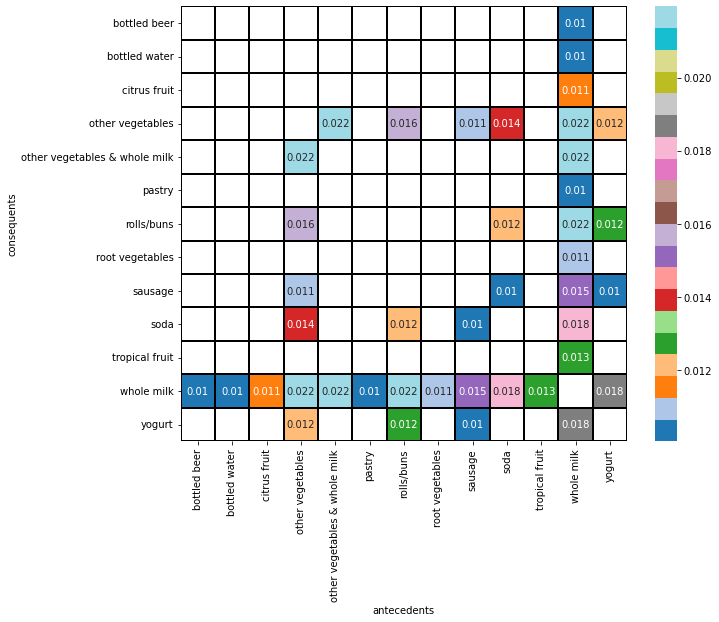

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(support_table, cmap= "tab20", annot=True, linewidths= 2, linecolor= 'black')
plt.show()

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

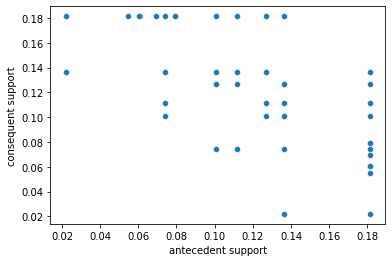

In [ ]:
sns.scatterplot(x="antecedent support", y="consequent support", data=rules)

<AxesSubplot:xlabel='antecedent support', ylabel='consequent support'>

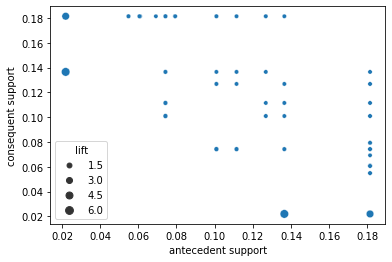

In [ ]:
sns.scatterplot(x="antecedent support",y="consequent support",size="lift",data=rules)

In [ ]:
frequent_itemsets = apriori(onehot, min_support=0.01,use_colnames=True, max_len=2)

In [ ]:
rules = association_rules(frequent_itemsets,metric = 'lift', min_threshold = 1.00)

In [ ]:
rules['antecedent'] = rules['antecedents'].apply(lambda antecedent: list(antecedent)[0])
rules['consequent'] = rules['consequents'].apply(lambda consequent: list(consequent)[0])
rules['rule'] = rules.index

In [ ]:
coords = rules[['antecedent','consequent','rule']]
# Print example
print(coords.head(1))

   antecedent    consequent  rule
0  whole milk  bottled beer     0


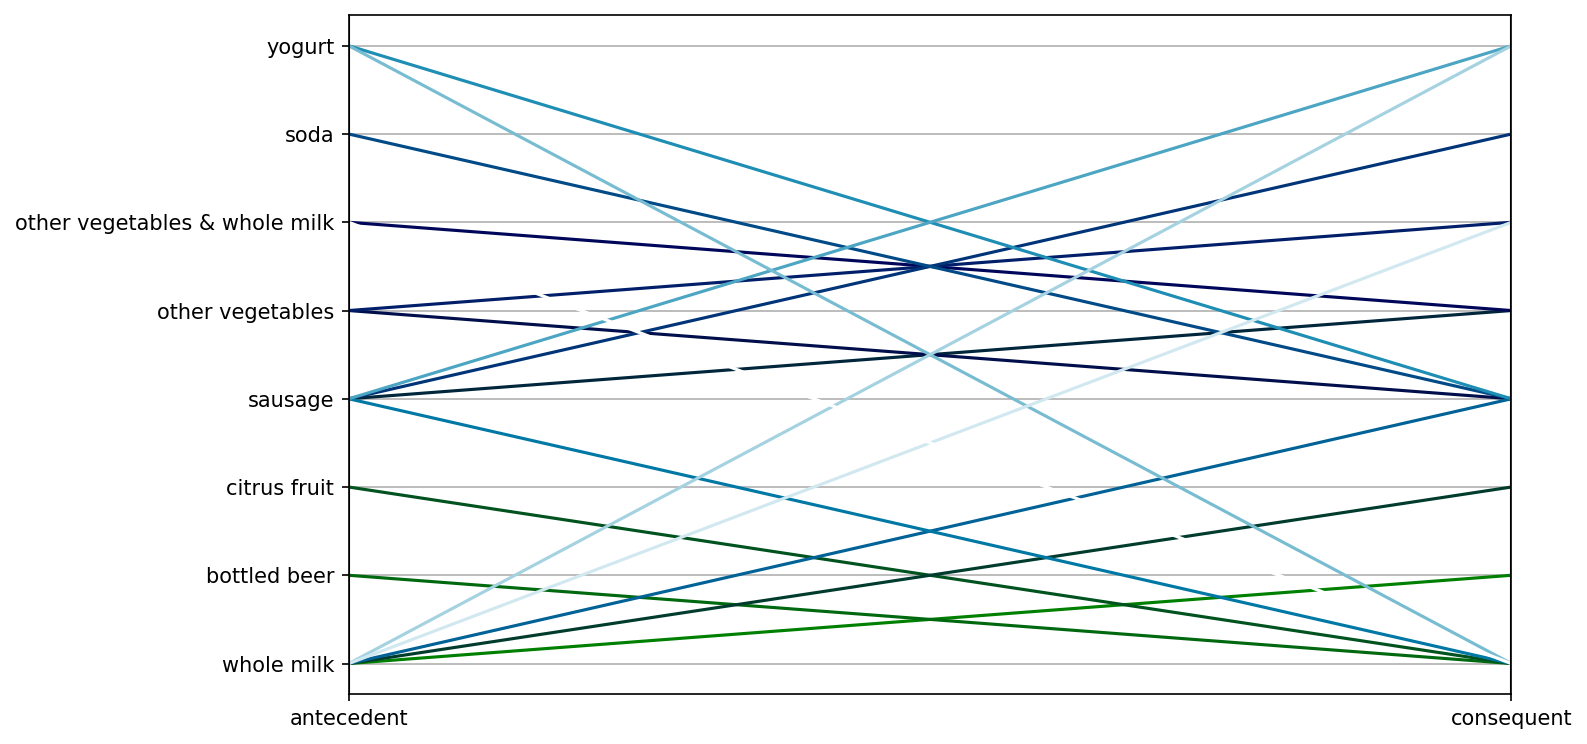

In [ ]:
plt.figure(figsize= (10,6), dpi= 150)
ax= parallel_coordinates(coords, 'rule', colormap = 'ocean')
leg = plt.legend()
 
ax.get_legend().remove()
plt.show()

In [ ]:
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values, 
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)

In [ ]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent,consequent,rule,zhang
0,(whole milk),(bottled beer),0.181445,0.054860,0.010472,0.057715,1.052039,0.000518,1.003030,whole milk,bottled beer,0,0.060430
1,(bottled beer),(whole milk),0.054860,0.181445,0.010472,0.190887,1.052039,0.000518,1.011670,bottled beer,whole milk,1,0.052336
2,(citrus fruit),(whole milk),0.060911,0.181445,0.011261,0.184881,1.018938,0.000209,1.004216,citrus fruit,whole milk,2,0.019791
3,(whole milk),(citrus fruit),0.181445,0.060911,0.011261,0.062065,1.018938,0.000209,1.001230,whole milk,citrus fruit,3,0.022706
4,(sausage),(other vegetables),0.074225,0.136531,0.010840,0.146048,1.069702,0.000706,1.011144,sausage,other vegetables,4,0.070384
